<a href="https://colab.research.google.com/github/kahram-y/first-repository/blob/master/DataCleansing/trip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 현재 작업 디렉터리(CWD) 확인
import os
print(os.getcwd())

/content


In [21]:
from google.colab import files

# 내 로컬 컴퓨터에 저장되어 있는 trip.csv 파일을 Colab의 CWDd에 업로드
uploaded = files.upload()

Saving trip.csv to trip.csv


In [25]:
# 데이터 불러오기
data = pd.read_csv('/content/trip.csv')

# 데이터 탐색하기
data.head()     # 데이터의 상위 5개 행을 미리보기로 출력

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [27]:
data.info()     # 데이터 정보 (컬럼명, 결측치 개수, 자료형, 전체 컬럼 수와 데이터 크기) 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [29]:
data.describe()     # 컬럼별 기초 통계량 (결측치 제외한 데이터 개수, 평균과 표준편차, 최소·최대값, 사분위수(Q1, Q2, Q3)) 확인

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [32]:
# 중복 데이터 확인
data[data.duplicated()]     # 중복된 행만 추출

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [33]:
data[data['passenger_name'] == 'Sarah Gross']       # 위에서 확인한 중복 데이터 중 승객명이 'Sarah Gross'인 행만 선택

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


In [34]:
data[data['passenger_name'] == 'Lisa Bullock']      # 위에서 확인한 중복 데이터 중 승객명이 'Lisa Bullock'인 행만 선택

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


In [41]:
# 중복 데이터 제거
data = data.drop_duplicates()
data        # 결과 확인

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [42]:
# 결측치 확인
data.isna().sum()

,0
passenger_name,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
payment_method,0
passenger_count,0
trip_distance,0
fare_amount,3
tip_amount,0
tolls_amount,0


In [43]:
# 결측치의 비율 확인
data.isna().mean()

,0
passenger_name,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
payment_method,0.000000
passenger_count,0.000000
trip_distance,0.000000
fare_amount,0.000132
tip_amount,0.000000
tolls_amount,0.000000


In [44]:
# 결측치가 있는 행 제거
data.dropna()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [48]:
# passenger_count 컬럼의 이상치 확인 (passenger_count가 6을 초과하는 경우)
data['passenger_count'].sort_values()       # passenger_count 컬럼의 값을 기준으로 정렬

,passenger_count
21754,0
21640,0
21218,0
20312,0
19458,0
...,...
5247,6
12412,6
12432,6
12440,6


<Axes: xlabel='None', ylabel='passenger_count'>

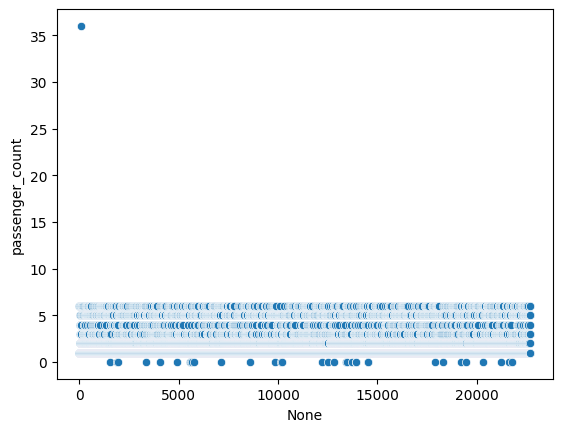

In [49]:
sns.scatterplot(x = data.index, y = data['passenger_count'])        # passenger_count 값의 scatter plot을 그려보기

In [50]:
# passenger_count 컬럼의 이상치 제거 (passenger_count가 6을 초과하는 경우)
data = data[data['passenger_count'] <= 6]

In [51]:
# passenger_count 컬럼의 이상치 확인 (passenger_count가 0인 경우)
len(data[data['passenger_count'] == 0])

33

In [52]:
# passenger_count 컬럼의 이상치 제거 (passenger_count가 0인 경우)
data = data[data['passenger_count'] != 0]

<Axes: xlabel='None', ylabel='passenger_count'>

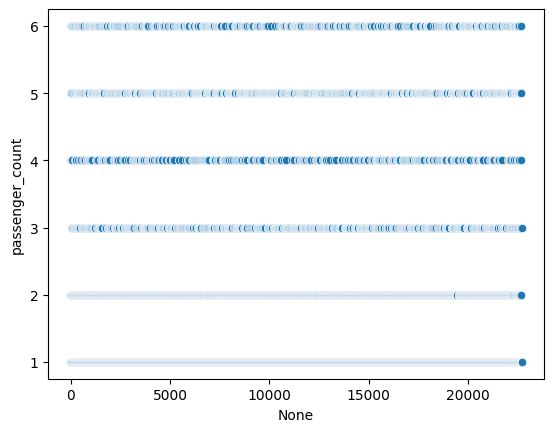

In [53]:
sns.scatterplot(x = data.index, y = data['passenger_count'])        # passenger_count의 scatter plot을 다시 그려보기

In [54]:
# trip_distance 컬럼의 이상치를 기초통계량으로 확인
data['trip_distance'].describe()

,trip_distance
count,22665.000000
mean,2.913989
std,3.654689
min,0.000000
25%,0.990000
50%,1.610000
75%,3.060000
max,33.960000


In [55]:
# trip_distance 컬럼의 이상치를 IQR 기준으로 확인
# IQR계산
Q1 = data['trip_distance'].quantile(0.25)
Q3 = data['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 조건 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 추출
outliers = data[(data['trip_distance'] < lower_bound) | (data['trip_distance'] > upper_bound)]
outliers

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
6,Tonya Moreno,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.50,9.86,0.00
11,Jamie Brown,03/05/2017 7:15:30 PM,03/05/2017 7:52:18 PM,Debit Card,2,18.90,52.00,14.58,5.54
22,Jacqueline Mclean DVM,10/11/2017 12:34:49 PM,10/11/2017 1:22:38 PM,Debit Card,1,12.30,68.25,12.00,16.26
30,David Burton,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,Credit Card,1,30.83,80.00,18.56,11.52
33,Amy Larsen,07/26/2017 11:26:50 PM,07/26/2017 11:55:49 PM,Cash,1,14.32,40.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22667,Angela Peterson,07/26/2017 7:52:51 PM,07/26/2017 8:15:50 PM,Debit Card,1,7.98,25.00,5.36,0.00
22670,Shirley Ferguson,02/22/2017 6:45:04 AM,02/22/2017 7:19:34 AM,Debit Card,5,25.30,67.50,17.08,0.00
22678,Ricardo Peterson,12/14/2017 12:21:01 PM,12/14/2017 12:56:21 PM,Cash,1,9.47,32.00,6.00,5.76
22688,Madison Harrell,02/08/2017 6:13:26 PM,02/08/2017 7:34:11 PM,Credit Card,5,10.64,52.00,14.84,5.54


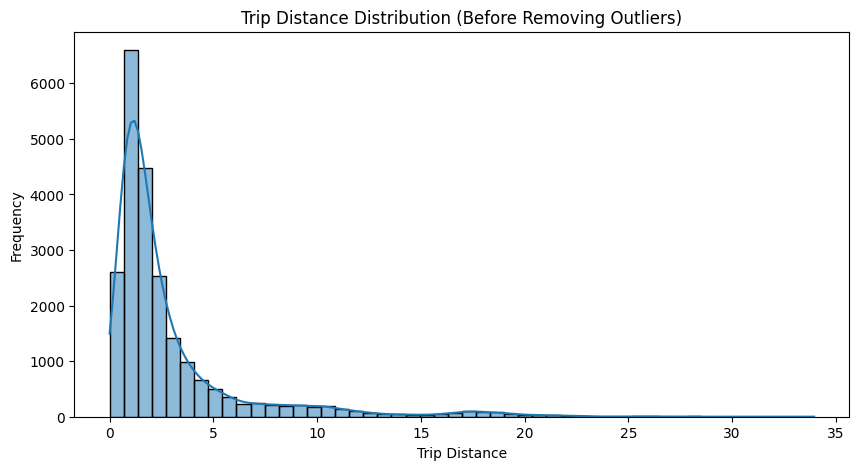

In [57]:
# trip_distance의 히스토그램을 그려보기
plt.figure(figsize=(10,5))
sns.histplot(data['trip_distance'], bins=50, kde=True)
plt.title('Trip Distance Distribution (Before Removing Outliers)')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.show()

In [58]:
# trip_distance 컬럼의 이상치를 IQR 기준으로 제거
data = data[(data['trip_distance'] >= lower_bound) & (data['trip_distance'] <= upper_bound)]

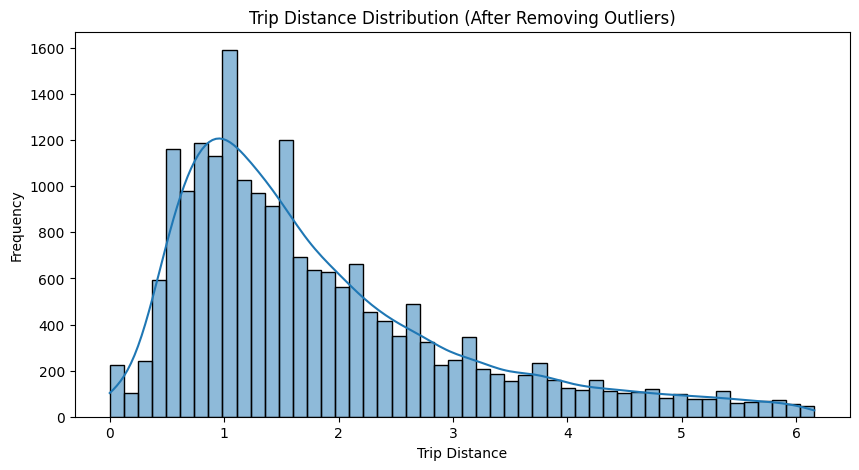

In [59]:
# trip_distance의 히스토그램을 다시 그려보기
plt.figure(figsize=(10,5))
sns.histplot(data['trip_distance'], bins=50, kde=True)
plt.title('Trip Distance Distribution (After Removing Outliers)')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.show()

# 이상치를 제거하기 전에는 분포의 꼬리가 길게 늘어진 모양이 보이고, 제거 후에는 중앙에 데이터가 몰려 정상적인 분포 형태로 정리된 모습을 확인할 수 있다.

In [62]:
# passenger_count 컬럼의 값을 기준으로 오름차순 정렬
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
12946,Patrick Herring,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,Cash,1,0.17,-120.00,0.00,0.00
11206,Austin Fields,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,Debit Card,1,0.64,-4.50,0.00,0.00
20700,Nicole Pierce,02/24/2017 12:38:17 AM,02/24/2017 12:42:05 AM,Cash,1,0.70,-4.50,0.00,0.00
14716,Stefanie Warner,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,Debit Card,5,0.40,-4.00,0.00,0.00
17604,Tyler Lowe,03/24/2017 7:31:13 PM,03/24/2017 7:34:49 PM,Cash,1,0.46,-4.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
12513,Mr. Wesley Reyes,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,Cash,1,0.00,175.00,46.69,11.75
15476,James Dyer MD,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,Debit Card,1,0.00,200.00,11.00,0.00
20314,Nicholas Thomas,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,Cash,2,0.00,450.00,0.00,0.00
8478,Alexis Hanson,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,Credit Card,1,2.60,999.99,200.00,0.00


In [61]:
# fare_amount 컬럼의 이상치 확인 (fare_amount가 0 이하인 경우)
len(data[data['fare_amount']<0])

14

In [65]:
# fare_amount 컬럼의 이상치 제거 (fare_amount가 0 이하인 경우)
data[data['fare_amount'] > 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0
...,...,...,...,...,...,...,...,...,...
22695,Patrick Williams,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,Cash,1,0.89,7.5,1.76,0.0
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.0
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.0
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.0


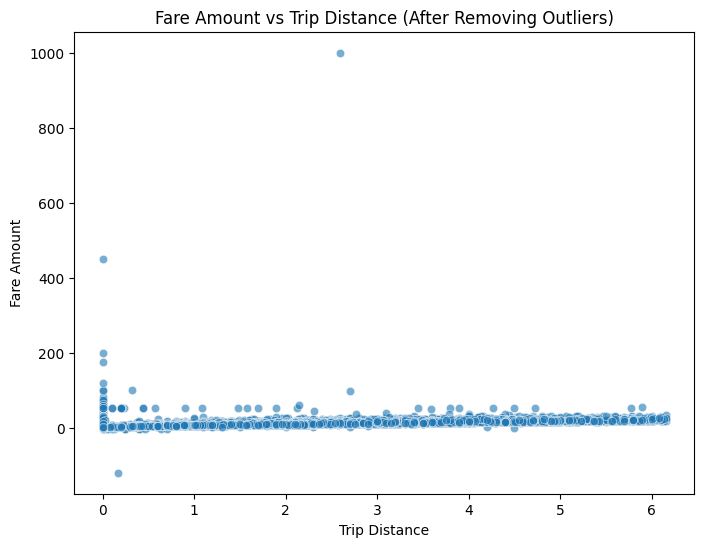

In [66]:
# fare_amount의 산점도(fare_amount vs trip_distance)를 그려보기
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='trip_distance',
    y='fare_amount',
    data=data,
    alpha=0.6
)
plt.title('Fare Amount vs Trip Distance (After Removing Outliers)')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

In [67]:
# fare_amount가 150을 초과한다면 150으로 변환.

def fare_func(x):
    if x > 150:
        return 150
    else:
        return x

In [68]:
data['fare_amount'].apply(fare_func)

,fare_amount
0,13.0
1,16.0
2,6.5
3,20.5
4,16.5
...,...
22695,7.5
22696,4.0
22698,4.5
22699,10.5


In [69]:
data['fare_amount'] = data['fare_amount'].apply(lambda x: 150 if x > 150 else x)

In [70]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
12946,Patrick Herring,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,Cash,1,0.17,-120.0,0.00,0.00
11206,Austin Fields,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,Debit Card,1,0.64,-4.5,0.00,0.00
20700,Nicole Pierce,02/24/2017 12:38:17 AM,02/24/2017 12:42:05 AM,Cash,1,0.70,-4.5,0.00,0.00
14716,Stefanie Warner,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,Debit Card,5,0.40,-4.0,0.00,0.00
17604,Tyler Lowe,03/24/2017 7:31:13 PM,03/24/2017 7:34:49 PM,Cash,1,0.46,-4.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...
20314,Nicholas Thomas,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,Cash,2,0.00,150.0,0.00,0.00
8478,Alexis Hanson,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,Credit Card,1,2.60,150.0,200.00,0.00
15476,James Dyer MD,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,Debit Card,1,0.00,150.0,11.00,0.00
12513,Mr. Wesley Reyes,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,Cash,1,0.00,150.0,46.69,11.75
